In [10]:
!pip install tensorflow numpy pandas matplotlib

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [12]:
np.random.seed(0)
t = np.linspace(0, 100, 500)
y = np.sin(t) + np.random.normal(0, 0.1, 500)

train_size = int(0.8 * len(t))
train_data, test_data = y[:train_size], y[train_size:]

# Define a function to create sequences for training
def create_sequences(data, seq_length, forecast_horizon):
    sequences = []
    target = []
    for i in range(len(data) - seq_length - forecast_horizon + 1):
        sequences.append(data[i:i+seq_length])
        target.append(data[i+seq_length: i+seq_length+forecast_horizon])
    return np.array(sequences), np.array(target)

seq_length = 10
forecast_horizon = 1
X_train, y_train = create_sequences(train_data, seq_length, forecast_horizon)
X_test, y_test = create_sequences(test_data, seq_length, forecast_horizon)

In [13]:
X_train.shape, y_train.shape

((390, 10), (390, 1))

In [14]:
# Reshape the input data for the CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
X_train.shape, X_test.shape

((390, 10, 1), (90, 10, 1))

In [16]:
# Create a CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', 
input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(forecast_horizon))  # Output layer for regression

/home/redninjale/AFTAC-DL/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
# Mean Squared Error for regression
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, 
y_test), verbose=2)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/50
25/25 - 1s - 21ms/step - loss: 0.1000 - val_loss: 0.0323
Epoch 2/50
25/25 - 0s - 4ms/step - loss: 0.0185 - val_loss: 0.0156
Epoch 3/50
25/25 - 0s - 4ms/step - loss: 0.0160 - val_loss: 0.0160
Epoch 4/50
25/25 - 0s - 3ms/step - loss: 0.0149 - val_loss: 0.0149
Epoch 5/50
25/25 - 0s - 3ms/step - loss: 0.0142 - val_loss: 0.0148
Epoch 6/50
25/25 - 0s - 3ms/step - loss: 0.0166 - val_loss: 0.0192
Epoch 7/50
25/25 - 0s - 3ms/step - loss: 0.0158 - val_loss: 0.0152
Epoch 8/50
25/25 - 0s - 3ms/step - loss: 0.0136 - val_loss: 0.0158
Epoch 9/50
25/25 - 0s - 3ms/step - loss: 0.0143 - val_loss: 0.0169
Epoch 10/50
25/25 - 0s - 3ms/step - loss: 0.0146 - val_loss: 0.0194
Epoch 11/50
25/25 - 0s - 3ms/step - loss: 0.0156 - val_loss: 0.0156
Epoch 12/50
25/25 - 0s - 3ms/step - loss: 0.0142 - val_loss: 0.0189
Epoch 13/50
25/25 - 0s - 3ms/step - loss: 0.0142 - val_loss: 0.0160
Epoch 14/50
25/25 - 0s - 3ms/step - loss: 0.0127 - val_loss: 0.0202
Epoch 15/50
25/25 - 0s - 3ms/step - loss: 0.0128 - val_l

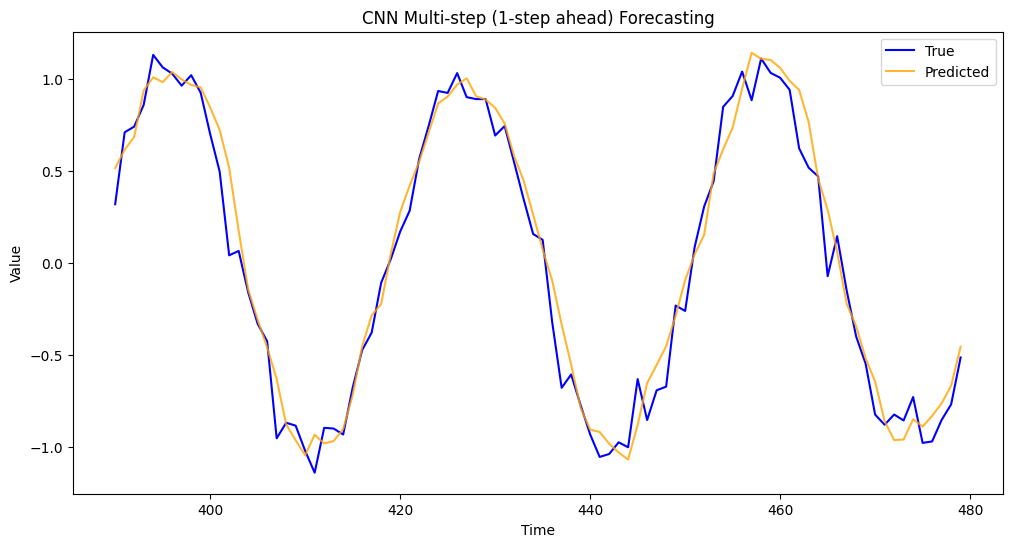

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# y_test: shape (num_samples, 10)
# y_pred: shape (num_samples, 10)

plt.figure(figsize=(12, 6))

# Flatten test data for comparison (true future values)
true_values = y_test.flatten()
pred_values = y_pred.flatten()

# Build a timeline that matches the test portion of your data
time_axis = np.arange(len(y_train), len(y_train) + len(true_values))
plt.plot(time_axis, true_values, label='True', color='blue')
plt.plot(time_axis, pred_values, label='Predicted', color='orange', alpha=0.8)

plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'CNN Multi-step ({forecast_horizon}-step ahead) Forecasting')
plt.show()
